In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<function matplotlib.pyplot.show(close=None, block=None)>

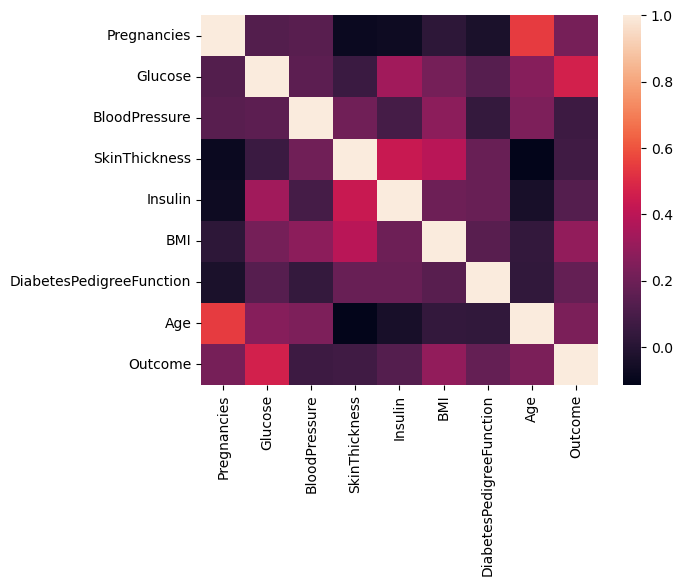

In [9]:
df_corr=df.corr()
sns.heatmap(df_corr,annot=False)
plt.show

In [10]:
corr_target = abs(df_corr['Outcome'])
features = corr_target[corr_target >= 0.10]
features = features.keys()
features

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

In [11]:
X= df[features]

In [12]:
X= X.drop("Outcome",axis=1)

In [13]:
X.head(5)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [14]:
y=df['Outcome']

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_score, recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [28]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
result = {}

In [30]:
models = {
    "KNN":KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes":GaussianNB(),
    "SVM":SVC(gamma=0.01, probability=True),
    "Random Forest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression(), 
    "XGBoost":XGBClassifier()
}

In [31]:

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    error_r = 1-accuracy
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    result[name] = {
        "Error rate": error_r,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1_score': f1
    }

In [32]:
results_df = pd.DataFrame(result).T
print(results_df)

                     Error rate  Accuracy    Recall  Precision  F1_score
KNN                    0.331169  0.668831  0.618182   0.531250  0.571429
Decision Tree          0.259740  0.740260  0.763636   0.608696  0.677419
Naive Bayes            0.220779  0.779221  0.709091   0.684211  0.696429
SVM                    0.318182  0.681818  0.400000   0.578947  0.473118
Random Forest          0.227273  0.772727  0.745455   0.661290  0.700855
AdaBoost               0.272727  0.727273  0.600000   0.622642  0.611111
Gradient Boosting      0.253247  0.746753  0.690909   0.633333  0.660870
Logistic Regression    0.240260  0.759740  0.654545   0.666667  0.660550
XGBoost                0.266234  0.733766  0.709091   0.609375  0.655462


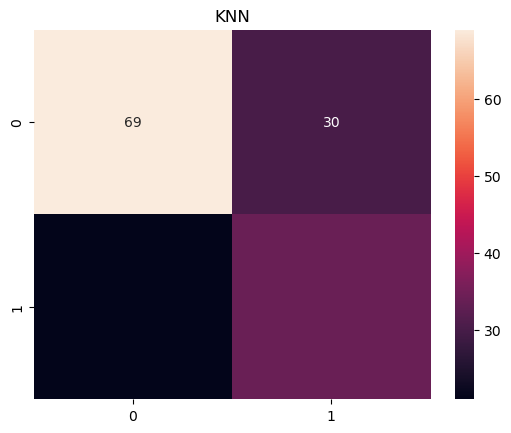

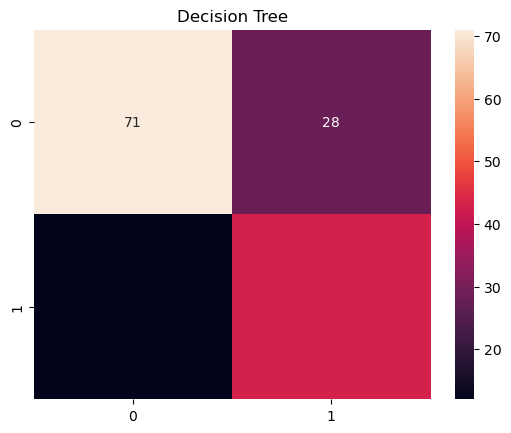

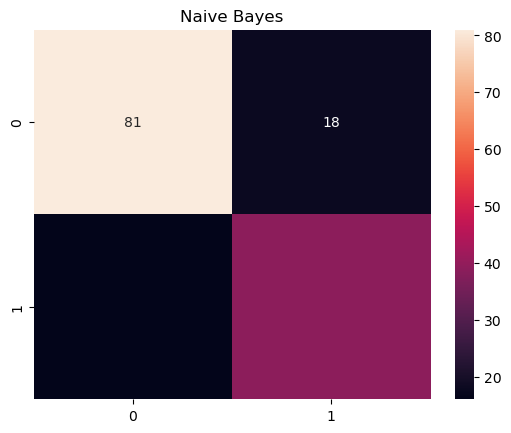

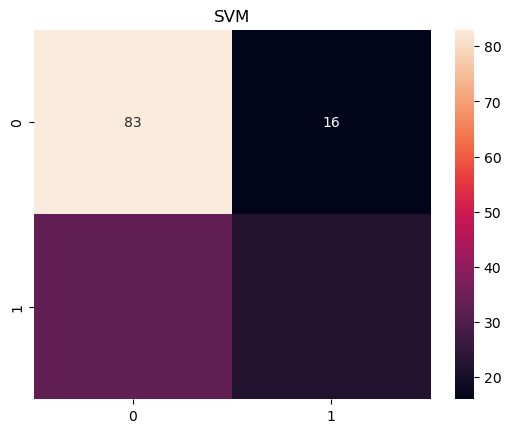

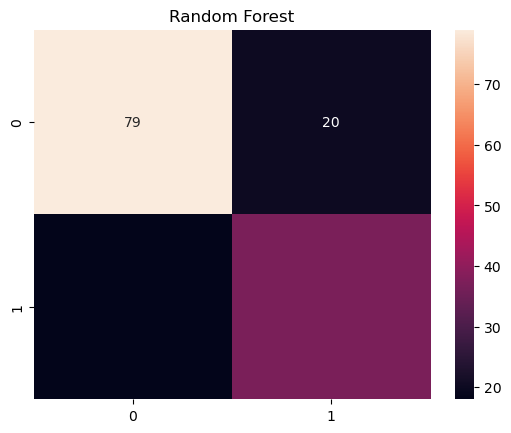

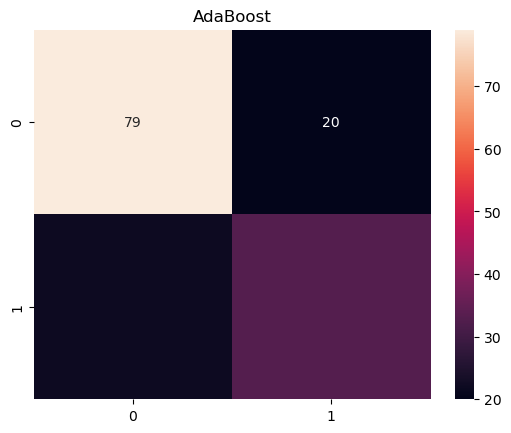

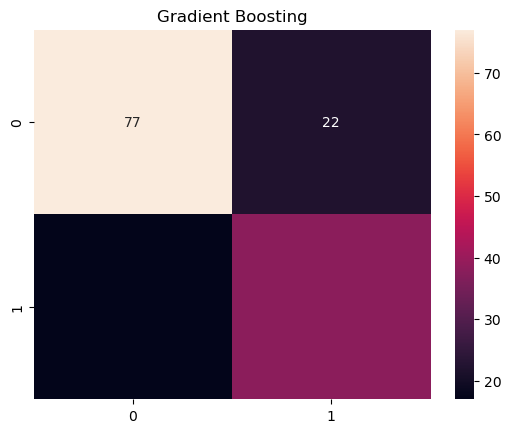

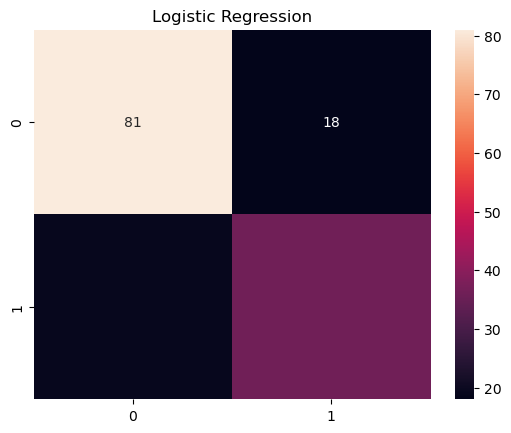

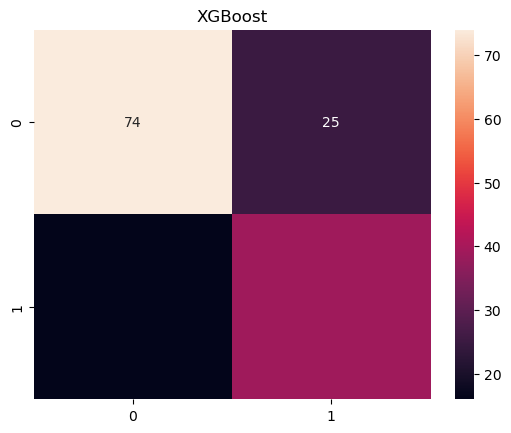

In [33]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    cnf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(cnf_matrix,annot=True)
    plt.title(name)
    plt.show()

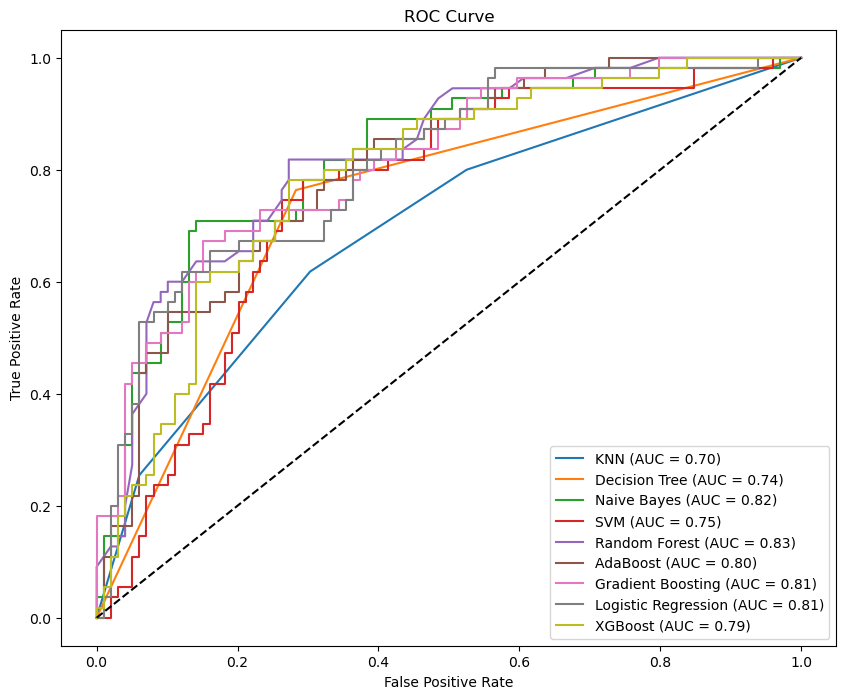

In [34]:
# Plot ROC Curve for all models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()